The following work is to be able to make proper connections for all the houses

which can give the best construction of the grid location with respect to the houses

that can give excess solar electricity to a certain grid and then be able to redistribute

the electricity to all the houses that need electricity i.e. to the needy

We will be using two libraries for this purpose 

NetworkX library for Graphs and Matplotlib

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

The following functions below is to construct a graph with n1 and n2 houses which are separately connected

In [19]:
'''
The following function is to make a connected graph
'''
def connected_graph(G,n):
    pos = nx.get_node_attributes(G,'pos')
    for i in range(1,n+1):
        for j in range(1,n+1):
            if(i!=j):
                G.add_edge(i,j,weight=((pos[i][0]-pos[j][0])**2 + (pos[i][1]-pos[j][1])**2)**(0.5))
    return G

'''
The following function is to make the nodes whithin the graph
'''
def make_graph(x,n):
    
    if(x==1):
        print("The following data is for the houses with Solar Panels")
    else:
        print("The following data is for the houses which need more electricity")
    G = nx.Graph()
    for i in range(1,n+1):
        print("Enter the (x,y) coordinates for house ",i)
        x = int(input("x coordinate: "))
        y = int(input("y coordinate: "))
        G.add_node(i,pos=(x,y))
    return G

'''
The following function is to set the graph
'''
def set_graph():
    n1 = int(input("Enter the number of houses with excess electricity: "))
    n2 = int(input("Enter the number of houses with needing electricity: "))
    G1 = make_graph(1,n1)
    G2 = make_graph(2,n2)
    G1 = connected_graph(G1,n1)
    G2 = connected_graph(G2,n2)
    c1 = []
    c2 = []
    for node in G1:
        c1.append('green')
    for node in G2:
        c2.append('red')
    return G1, G2, c1, c2, n1, n2

Setting all the graph vertices and its edges with respect to its coordinates

In [20]:
G1, G2, c1, c2, n1, n2 = set_graph()

Enter the number of houses with excess electricity: 20
Enter the number of houses with needing electricity: 15
The following data is for the houses with Solar Panels
Enter the (x,y) coordinates for house  1
x coordinate: 1
y coordinate: 3
Enter the (x,y) coordinates for house  2
x coordinate: 11
y coordinate: 3
Enter the (x,y) coordinates for house  3
x coordinate: 12
y coordinate: 44
Enter the (x,y) coordinates for house  4
x coordinate: 12
y coordinate: 66
Enter the (x,y) coordinates for house  5
x coordinate: 78
y coordinate: 33
Enter the (x,y) coordinates for house  6
x coordinate: 38
y coordinate: 90
Enter the (x,y) coordinates for house  7
x coordinate: 22
y coordinate: 12
Enter the (x,y) coordinates for house  8
x coordinate: 45
y coordinate: 23
Enter the (x,y) coordinates for house  9
x coordinate: 56
y coordinate: 67
Enter the (x,y) coordinates for house  10
x coordinate: 32
y coordinate: 21
Enter the (x,y) coordinates for house  11
x coordinate: 45
y coordinate: 6
Enter the (

We need to be able to find the Energy Grid in order to store the excess electricity

So we find the minimum of the distance between each pair of vertices in this scenario

and place it in between the midpoint of the line to maximize efficiency

In [21]:
'''
Setting the energy grid in the graph
'''
def setting_energygrid(G1,G2,n1,n2,c1,c2):
    minimum = 9999999999
    gr_1 = 0
    gr_2 = 0
    pos1 = nx.get_node_attributes(G1,'pos')
    pos2 = nx.get_node_attributes(G2,'pos')
    for i in range(1,n1+1):
        for j in range(1,n2+1):
            if(minimum>((pos1[i][0]-pos2[j][0])**2 + (pos1[i][1]-pos2[j][1])**2)**(0.5)):
                minimum = ((pos1[i][0]-pos2[j][0])**2 + (pos1[i][1]-pos2[j][1])**2)**(0.5)
                gr_1 = i
                gr_2 = j
    G1.add_node(n1+1,pos=((pos1[gr_1][0]+pos2[gr_2][0])/2,(pos1[gr_1][1]+pos2[gr_2][1])/2))
    G2.add_node(n2+1,pos=((pos1[gr_1][0]+pos2[gr_2][0])/2,(pos1[gr_1][1]+pos2[gr_2][1])/2))
    G1.add_edge(n1+1,gr_1,weight=((
        (pos1[gr_1][0] - (pos1[gr_1][0]+pos2[gr_2][0])/2)**2 +
        (pos1[gr_1][1] - (pos1[gr_1][1]+pos2[gr_2][1])/2)**2)**(0.5)))       
    G2.add_edge(n2+1,gr_2,weight=((
        (pos2[gr_1][0] - (pos1[gr_1][0]+pos2[gr_2][0])/2)**2 +
        (pos2[gr_1][1] - (pos1[gr_1][1]+pos2[gr_2][1])/2)**2)**(0.5)))
    c1.append('yellow')
    c2.append('yellow')
    return G1, G2, c1, c2

All the connected houses where green is the houses with solar panels and excess electrical output

while red are the houses of the needy in need for the electricity

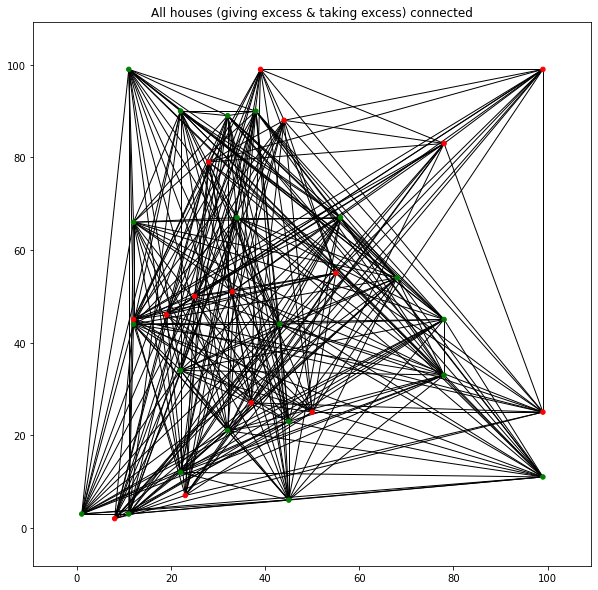

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("All houses (giving excess & taking excess) connected")
pos1 = nx.get_node_attributes(G1,'pos')
pos2 = nx.get_node_attributes(G2,'pos')
nx.draw(G1,pos1,node_color=c1,node_size=20)
nx.draw(G2,pos2,node_color=c2,node_size=20)
ax.set_axis_on()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

The connection after the Energy grid (yellow) is placed

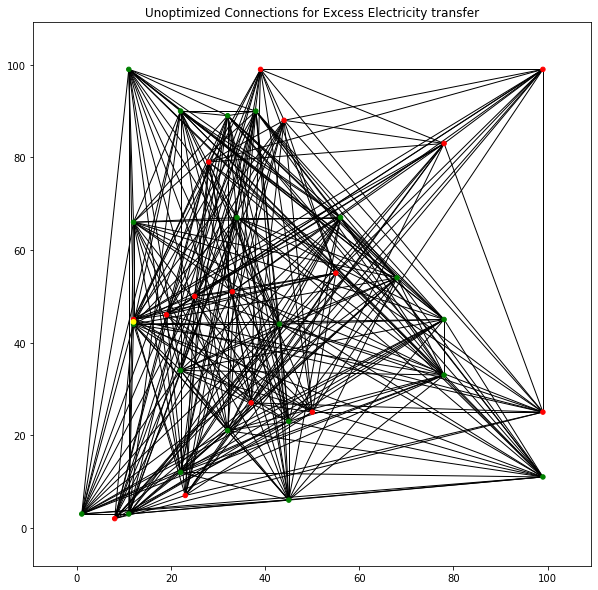

In [23]:
G1_new, G2_new, c1_new, c2_new = setting_energygrid(G1,G2,n1,n2,c1,c2)
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Unoptimized Connections for Excess Electricity transfer")
pos1_new = nx.get_node_attributes(G1_new,'pos')
pos2_new = nx.get_node_attributes(G2_new,'pos')
nx.draw(G1_new,pos1_new,node_size=20,node_color=c1_new)
nx.draw(G2_new,pos2_new,node_size=20,node_color=c2_new)
ax.set_axis_on()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

The final and optimized connection after finding the MST (Minimum Spanning tree)

using either of Kruskals/Prims Algorithm

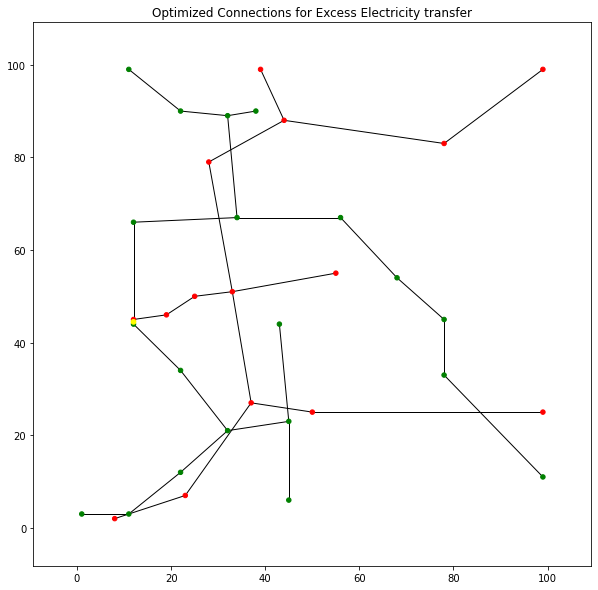

In [24]:
giving = nx.minimum_spanning_tree(G1_new)
taking = nx.minimum_spanning_tree(G2_new)
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Optimized Connections for Excess Electricity transfer")
nx.draw(giving,pos1_new,node_size=20,node_color=c1_new,ax=ax)
nx.draw(taking,pos2_new,node_size=20,node_color=c2_new,ax=ax)
ax.set_axis_on()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)